## Goals
- Implement model that can work with both images and videos

## Imports

In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.layers import MaxPooling2D, ReLU, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50

# Utilities
import os

# Notebook Utilities
%matplotlib inline

## Reading Data

In [2]:
data = pd.read_csv(f'../data/interim/train.csv')
data.head()

,Image,Label
0,../data/raw/train/Apple Red 1/0_100.jpg,Apple Red 1
1,../data/raw/train/Apple Red 1/100_100.jpg,Apple Red 1
2,../data/raw/train/Apple Red 1/101_100.jpg,Apple Red 1
3,../data/raw/train/Apple Red 1/102_100.jpg,Apple Red 1
4,../data/raw/train/Apple Red 1/103_100.jpg,Apple Red 1


## Reading Images

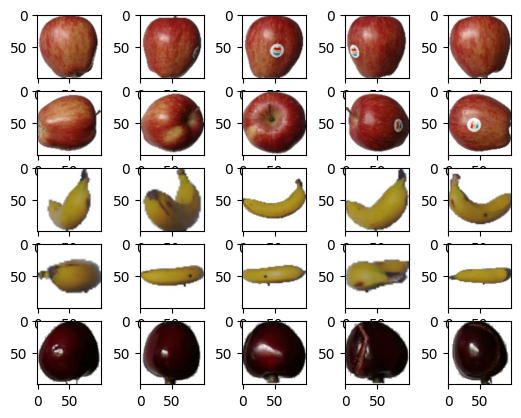

In [3]:
fig = plt.figure()
for i, j in zip(range(25), range(0, 1500, 50)):
    image = plt.imread(data['Image'][j])
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(image)
plt.show()

In [4]:
train = ImageDataGenerator(rescale=1/255).flow_from_directory('../data/raw/train/', 
                                                              target_size=(100, 100), class_mode='sparse')
validation = ImageDataGenerator(rescale=1/255).flow_from_directory('../data/raw/test/', 
                                                              target_size=(100, 100), class_mode='sparse')

Found 1474 images belonging to 3 classes.


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../data/raw/test/'

## Operations

In [5]:
model = Sequential()
model.add(Conv2D(4, (5, 5), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 4)         304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        1616      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 32)        12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0

In [7]:
model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
data = pd.DataFrame({'Image':[plt.imread(i) for i in data['Image']], 'Label':data['Label']})

In [9]:
data.head()

,Image,Label
0,"[[[255, 253, 255], [255, 253, 255], [255, 255,...",Apple Red 1
1,"[[[255, 253, 255], [255, 253, 255], [255, 255,...",Apple Red 1
2,"[[[255, 252, 255], [255, 253, 255], [255, 253,...",Apple Red 1
3,"[[[255, 252, 255], [255, 253, 255], [255, 253,...",Apple Red 1
4,"[[[255, 253, 255], [255, 253, 255], [254, 254,...",Apple Red 1


In [10]:
x = data['Image']
y = data['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [15]:
# model.fit(x_train/255.0, y_train, epochs=5, validation_data=(x_test/255.0, y_test))
model.fit(train, epochs=5, validation_data=validation)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [53]:
test = ImageDataGenerator(rescale=1/255).flow_from_directory('../data/raw/test/', 
                                                              target_size=(100, 100), class_mode='sparse')

Found 494 images belonging to 3 classes.


In [41]:
pred = model.predict(test)

16/16 [==============================] - 2s 78ms/step


In [42]:
pred

array([[ 0.      ,  0.      , 27.00081 ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       ...,
       [ 0.      , 13.880122,  0.      ],
       [ 0.      , 15.827214,  0.      ],
       [ 0.      ,  0.      , 26.16968 ]], dtype=float32)

In [43]:
labels = data['Label'].unique()

In [44]:
indices = np.argmax(pred, axis=1)
pred = np.array(labels)[indices]

In [60]:
vgg_model = VGG16(input_shape=(100, 100, 3), include_top=False, classes=3, pooling='max')

In [61]:
# vgg_test = tensorflow.keras.applications.vgg16.preprocess_input(test)
vgg_pred = vgg_model.predict(test)

16/16 [==============================] - 30s 2s/step


In [64]:
len(vgg_pred)

494

In [65]:
indices = np.argmax(vgg_pred, axis=1)
# vgg_pred = np.array(labels)[indices]

In [66]:
indices

array([155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 15

In [22]:
resnet_model = ResNet50(weights='imagenet')

In [54]:
resnet_pred = resnet_model.predict(test)

16/16 [==============================] - 15s 924ms/step


In [56]:
resnet_pred

array([[1.90765204e-05, 1.20738652e-04, 5.06273282e-05, ...,
        9.07999220e-06, 4.56473826e-05, 2.19163136e-03],
       [1.72791861e-05, 1.12188354e-04, 4.79532246e-05, ...,
        8.51661025e-06, 4.44838661e-05, 1.95658160e-03],
       [1.75244350e-05, 8.01971109e-05, 3.47351015e-05, ...,
        7.38754352e-06, 4.52215318e-05, 1.29488739e-03],
       ...,
       [1.50858295e-05, 8.73068420e-05, 4.45421574e-05, ...,
        7.32030048e-06, 4.60850206e-05, 1.79936807e-03],
       [1.62175984e-05, 1.03448772e-04, 4.43496174e-05, ...,
        7.67665188e-06, 4.66298843e-05, 1.93317246e-03],
       [1.71284191e-05, 1.14025206e-04, 4.81290044e-05, ...,
        8.40538632e-06, 4.45289479e-05, 1.96345639e-03]], dtype=float32)

In [57]:
indices = np.argmax(resnet_pred, axis=1)
# resnet_pred = np.array(labels)[indices]

In [58]:
indices

array([470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470,
       470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 470, 47

In [29]:
test_dir = '../data/raw/test/'
fruits = []
fruits_image = []
for i in os.listdir(test_dir):
    for image_filename in os.listdir(test_dir + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(test_dir + i + '/' + image_filename)

In [48]:
v_pred = [i for i in vgg_pred]

In [49]:
comparison = pd.DataFrame({'Test_Label':fruits, 'CNN_Pred':pred, 'VGG_Pred':v_pred})

In [50]:
comparison

,Test_Label,CNN_Pred,VGG_Pred
0,Apple Red 1,Cherry 1,"[[Apple Red 1, Apple Red 1, Banana, Apple Red ..."
1,Apple Red 1,Apple Red 1,"[[Cherry 1, Apple Red 1, Banana, Apple Red 1, ..."
2,Apple Red 1,Apple Red 1,"[[Cherry 1, Apple Red 1, Banana, Banana, Cherr..."
3,Apple Red 1,Banana,"[[Banana, Apple Red 1, Banana, Apple Red 1, Ap..."
4,Apple Red 1,Cherry 1,"[[Banana, Apple Red 1, Apple Red 1, Apple Red ..."
...,...,...,...
489,Cherry 1,Banana,"[[Apple Red 1, Apple Red 1, Apple Red 1, Apple..."
490,Cherry 1,Banana,"[[Banana, Apple Red 1, Banana, Apple Red 1, Ch..."
491,Cherry 1,Banana,"[[Apple Red 1, Apple Red 1, Cherry 1, Apple Re..."
492,Cherry 1,Banana,"[[Cherry 1, Apple Red 1, Banana, Apple Red 1, ..."


## Insights 
- 

## Conclusions
- 